# Simulating Scattering Patterns from Molecular Structures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued_theory as gt

## Simulate Static Diffraction

In [3]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/' # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
mol_name='cf3i_opt'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

f = gt.import_DCS(55)
s000 = gt.import_s()
s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

### Get Static sM and PDF

* '`f=import_DCS(55)` reads in the values from dat files up to max atom number (55) then returns a variable f of shape (max atomic number + 1, 130) which contains information on the atomic form factors for each atom from its .dat file.  

* `s000 = import_s()` = reads in information from .dat file (generated from ELSEPA) and returns s based 
    \begin{equation}
    E = E_{kin} q_{e} + m_{e}c^{2}
    \end{equation} 

    where $m_{e}$ is the mass of the electron, $q_{e}$ is the charge of the electron, and $c$ is the speed of light. Following this, the momentum $p$, wavelength $\lambda$, and wave vector $\kappa$ are calculated following

    \begin{equation}
    p = \sqrt{{E^{2} \over c^{2}} - m_{e}^{2}c^{2}}  
    \end{equation}

    \begin{equation}
    \lambda = {h \over p}  
    \end{equation}

    \begin{equation}
    \kappa = {2 \pi \over \lambda}  
    \end{equation}

    then $s$ is calculated from $\theta$ in radians as read from the .dat file and 
    
    \begin{equation}
    s = 2 \kappa \sin(0.5 \theta)
    \end{equation}
    
* `[coor, atom, sum] = load_static_mol_coor(path_mol, mol_name, file_type)` returns the xyz coordinates and the number of atoms in the molecule

* `[I, I_at, I_mol, s] = get_I_from_mol_coor(f, s000, s_max, coor, atom_sum)` calculates the scattering intensities for $I_{tot}$, $I_{at}$, and $I_{mol}$ based on

    \begin{equation}
    I(s) = I_{at} + I_{mol} = \sum_{i=1}^{N} |f_{i}(s)|^{2} + \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} f_{i}^{\ast}(s) f_{j}(s) { \sin (s r_{ij}) \over s r_{ij}}
    \end{equation}

    interpolates the values from the .dat file based on the above equation and the defined s range using `scipy.interpolate`. 
* `[sM, PDF, r] = get_sM_and_PDF_from_I(I_at, I_mol, s, r_max, damp_const)` returns the sM and PDF based on the following equations

    \begin{equation}
    sM(s) = s {I_{mol} \over I_{at}}
    \end{equation} 
    
    \begin{equation} 
    PDF(r) \approx r \int_{s_{min}}^{s_{max}} sM(s) \sin(sr) e^{-\alpha s^{2}} ds
    \end{equation} 


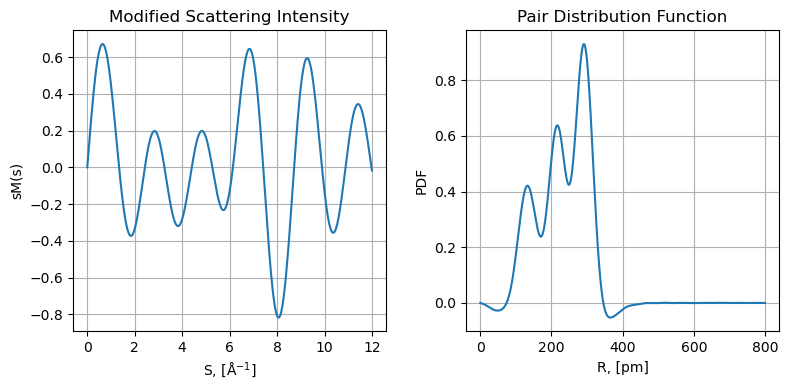

In [4]:
coor, atom_sum  = gt.load_static_mol_coor(path_mol,mol_name,file_type)
I_new,I_at_new,I_mol_new,s_new = gt.get_I_from_xyz(f,s000,s_max,coor,atom_sum)
sM_new,PDF_new,r_new = gt.get_sM_and_PDF_from_I(I_at_new,I_mol_new,s_new,r_max,damp_const)
# plot_I_sM_PDF(I,sM,PDF,s,r,mol_name+' I elastic',mol_name+' sM',mol_name+' PDF'); # use or not using plot-function 
plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s_new,sM_new)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('sM(s)')
plt.title('Modified Scattering Intensity')
plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r_new,PDF_new)
plt.xlabel(r'R, [pm]')
plt.ylabel('PDF')
plt.title('Pair Distribution Function')
plt.grid()
    
plt.tight_layout()
plt.show()

## Get Time Resolved Pattern

In [5]:
mol_name = 'CI2H2_time_evol'

coor, atom_sum, time = gt.load_time_evolving_xyz(path_mol, mol_name, file_type)

count =  1150
4


count =  1150
4


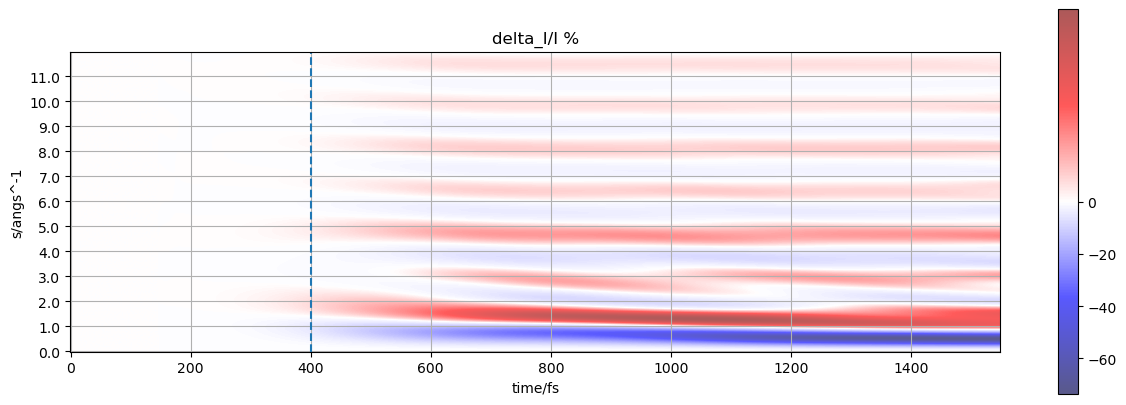

In [6]:
gt.trajectory_sim(path_mol, mol_name, file_type, f, s000, s_max)

## Frequency Mode Diffraction Pattern

In [7]:
mol_name = 'cf3i_opt.hess.v008'
re, atom_sum, time = gt.load_freq_xyz(path_mol, mol_name, file_type)
dI_I, new_time, s, PDF, r = gt.freq_sim(path_mol, mol_name, file_type, f, s000, s_max)
PDF.shape

277.2042
fs= 120.6504665279664
277.2042
fs= 120.6504665279664


(200, 800)

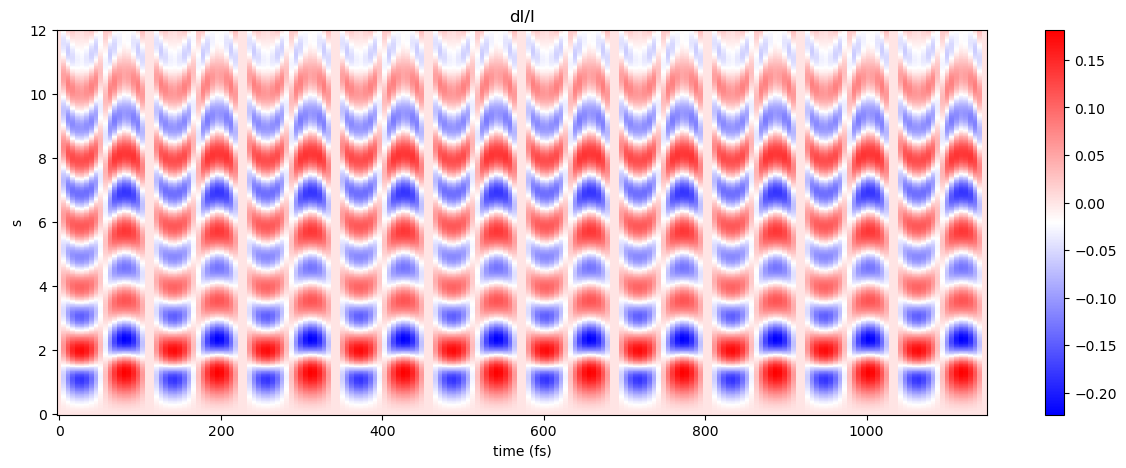

In [8]:
plt.figure(figsize=(15,5))
plt.pcolor(new_time, s, dI_I.T, cmap='bwr')
plt.colorbar()
plt.xlabel("time (fs)")
plt.ylabel("s")
plt.title("dI/I")
plt.show()

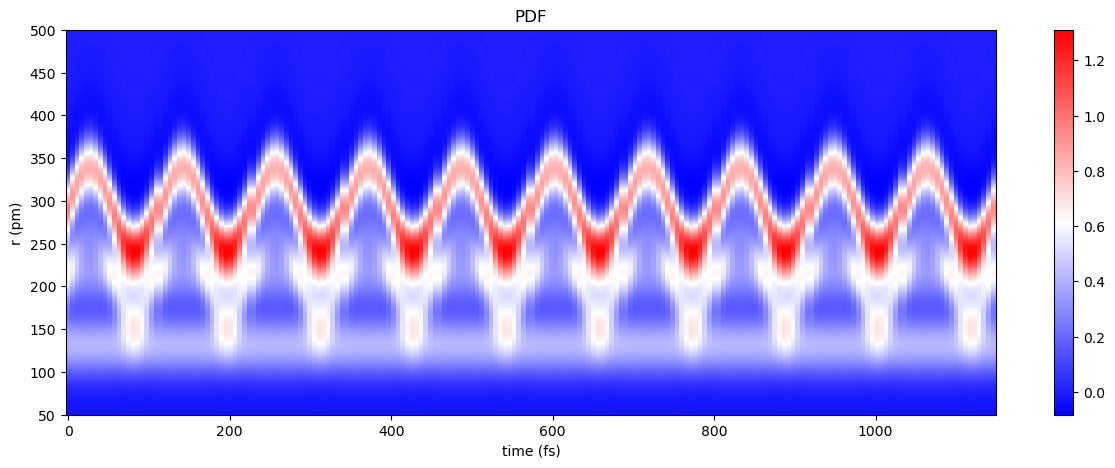

In [9]:
plt.figure(figsize=(15,5))
plt.pcolor(new_time, r, PDF.T, cmap='bwr')
plt.colorbar()
plt.xlabel("time (fs)")
plt.ylabel("r (pm)")
plt.ylim(50, 500)
plt.title("PDF")
plt.show()

## Simulating Fragmentation

Simulates a diffraction pattern based on the a unimolecular dissociation following: 

\begin{equation}
reactant \longrightarrow fragment_1 + fragment_2
\end{equation}

where the sum of fragments = reactant. __Code can take any number of fragments.__ 

In [5]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/'; # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
reactant='o-ntph_opt'
products = ['ntph_nohono', 'hono']
#reactant = 'cf3i_opt'
#products = ['cf3', 'i']

file_type='.xyz'; # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

f = gt.import_DCS(55)
s000 = gt.import_s()
s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

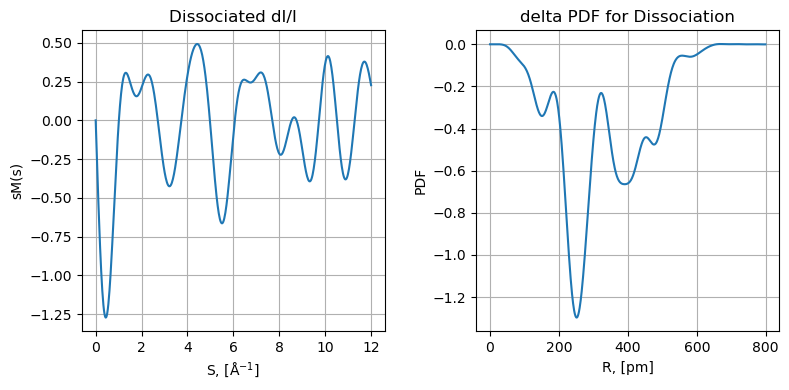

In [6]:
dsM, s, dPDF, r = gt.dissoc_sim(path_mol, reactant, products, file_type, f, s000, s_max)

plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s,dsM)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('sM(s)')
plt.title('Dissociated dI/I');
plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r,dPDF);
plt.xlabel(r'R, [pm]');
plt.ylabel('PDF');
plt.title('delta PDF for Dissociation');
plt.grid()
    
plt.tight_layout()
plt.show()